<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_week2_2_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH10_03 시본(Seaborn)
###시각화를 위한 차트/그래프 유형
1. 통계 분석- 통계적 특성 설명 (왜곡된 분포, 칼럼들 간의 상관관계, 이상치 값 도출)
2. 비즈니스 분석- 청중의 유형과 수준, 설득

- 시각화 플롯 : 히스토그램, 바 플롯, 박스 플롯, 바이올린 플롯, 스캐터 플롯, 상관
히트맨

"대부분 시각화 함수들은 hue 인자를 통해 3개의 변수도 함께 정보로 시각화 가능"

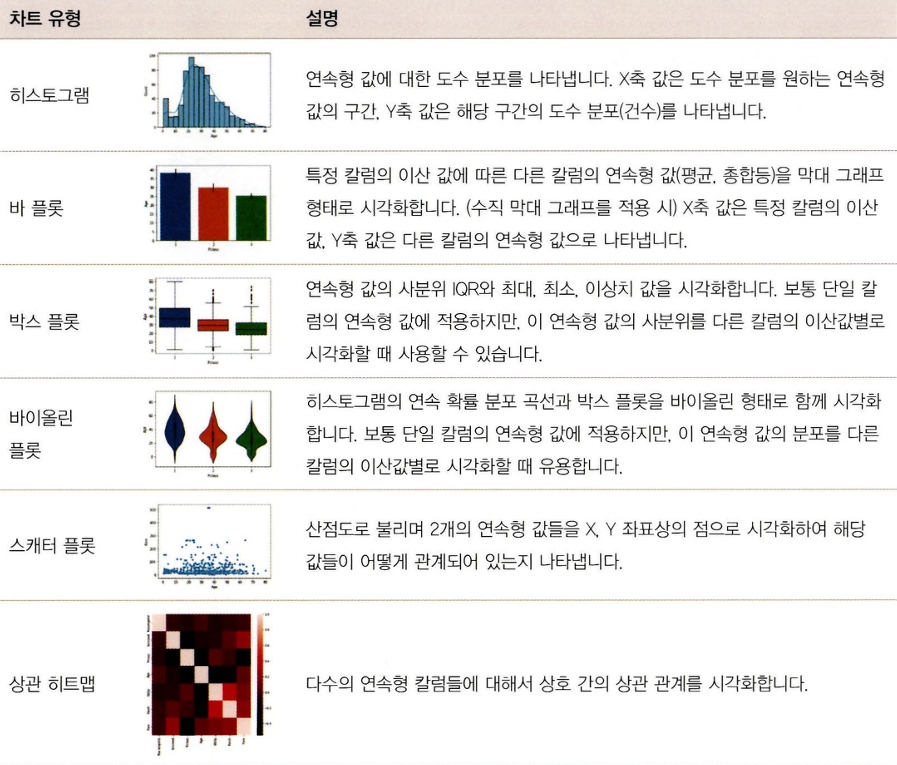

###히스토그램 : 연속형 값을 범위 또는 구간으로 그룹화하여 개별 구간에 해당되는 데이터 건수 시각화함.
>histplot()-> Axes 레벨 함수, displot()-> Figure 레벨 함수 사용

> Figure 레벨 함수 특징 : 맷플롯립 API 사용 최소화, 사용 시 Figure의 크기는 plt.figure()로 조절할 수 없음

In [3]:
import pandas as pd
titanic_df= pd.read_csv("/content/train.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


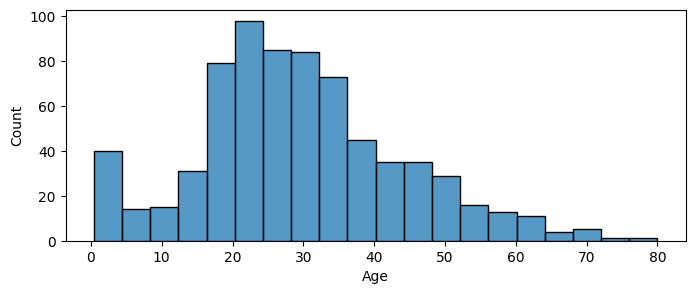

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8,3))

#DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'],bins=20)
plt.show()

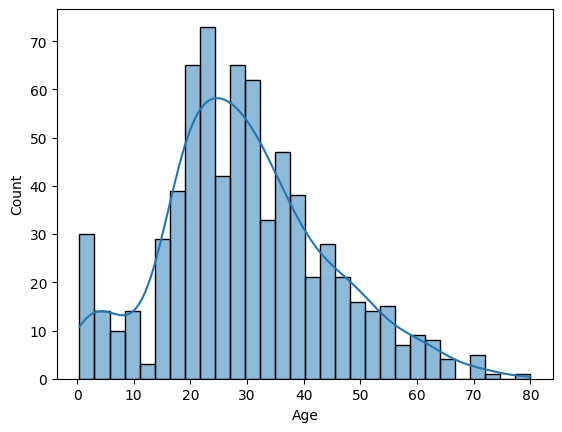

In [5]:
sns.histplot(x='Age',data=titanic_df, bins=30, kde=True) #kde는 연속 확률분포 곡선인듯
plt.show()

<Figure size 800x400 with 0 Axes>

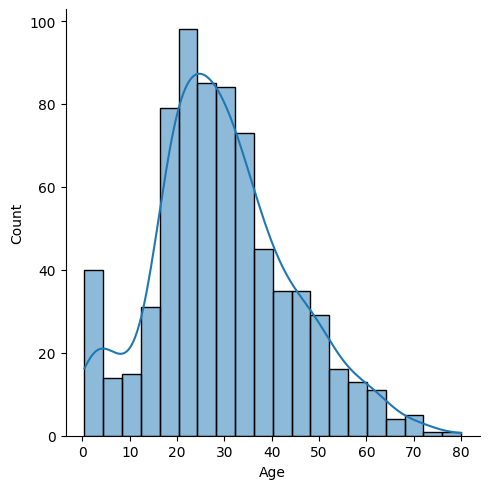

In [6]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure()로 Figure 크기를 조절할 수 없습니다.
plt.figure(figsize=(8,4))
sns.displot(x="Age", data=titanic_df, kde=True)
plt.show()

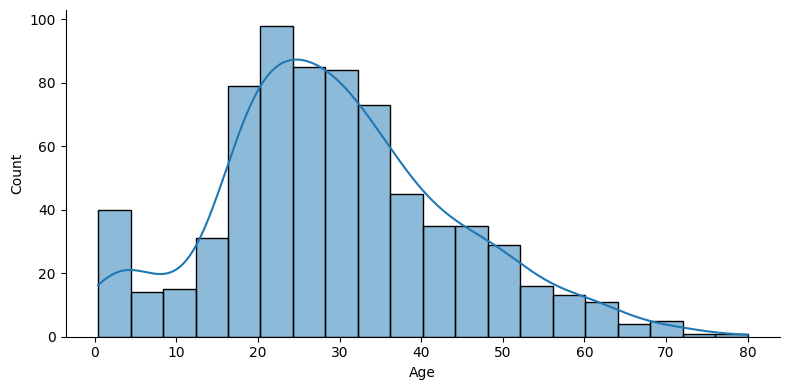

In [7]:
#Figure 크기 조절 인자- height 세로(높이) / aspect 배율 -> 가로는 세로*배율
import seaborn as sns

sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()

###카운트 플롯

:이산형 값의 건수를 막대 그래프 형태로 시각화 -> 카테로기성 칼럼 값별 건수에 사용
- countplot() 사용

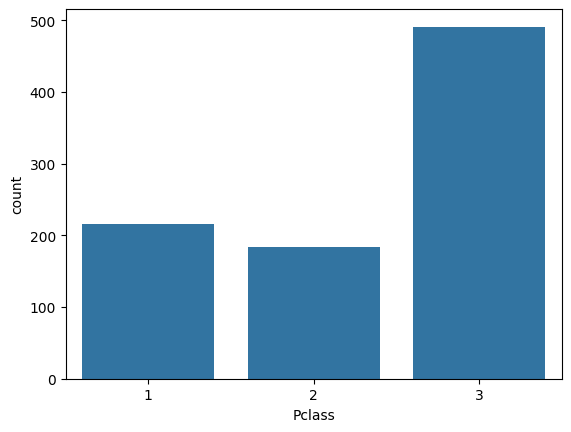

In [8]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

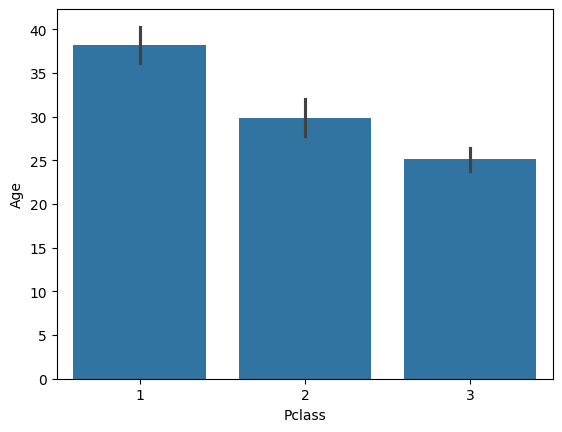

In [9]:
#자동으로 xlabel, ylabel을 barplot()의 x 인자값인 Pclass, y 인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

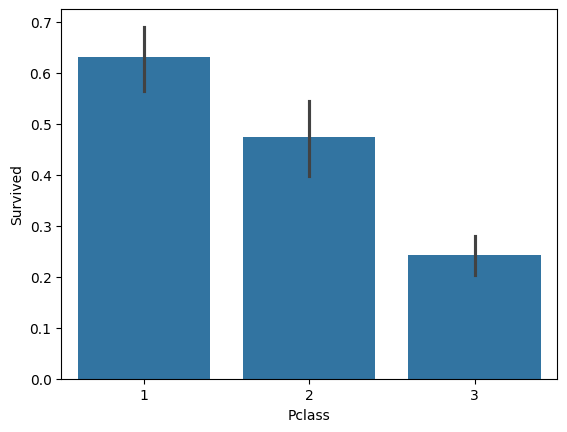

In [11]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()
#survived 값을 평균으로 표현

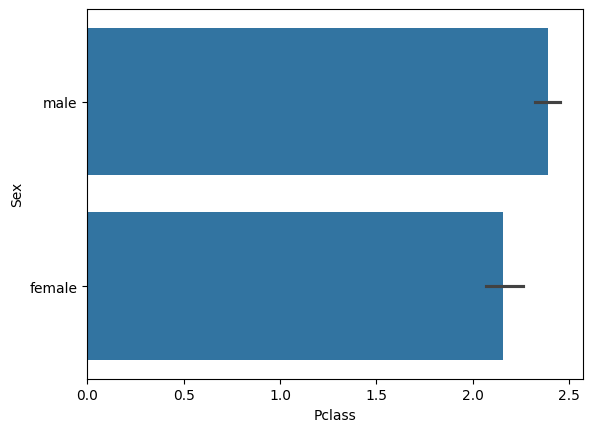

In [12]:
#barplot() - orient 인자 v 인 경우 수직, h 인 경우 수평 그래프
### y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.show()

#Pclass 값이 평균값으로 표시

<Axes: xlabel='Name', ylabel='Sex'>

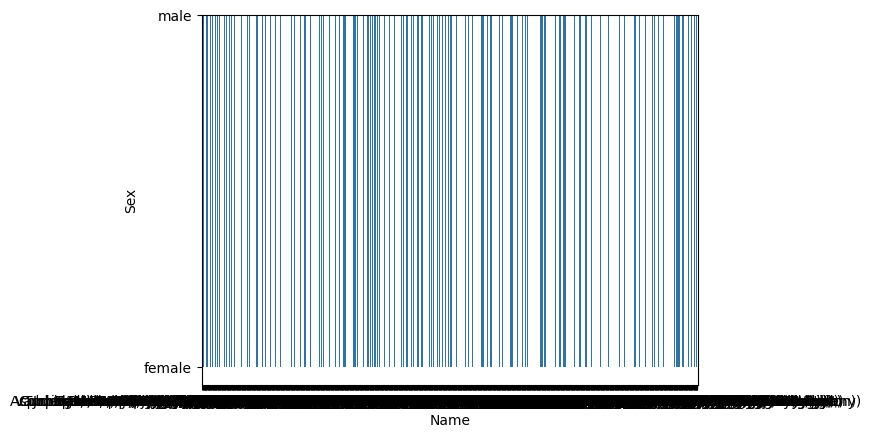

In [14]:
#x 인자로 문자열인 Name을, y 인자로 문자열인 Sex를 입력하므로 barplot은 오류를 발생.
sns.barplot(x='Name', y='Sex', data=titanic_df) #???

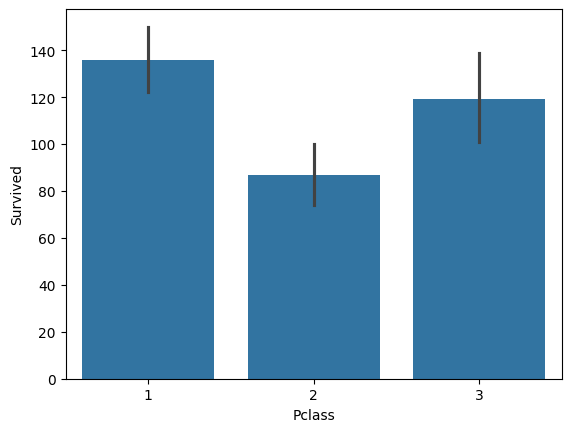

In [15]:
#estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, estimator=sum)
plt.show()

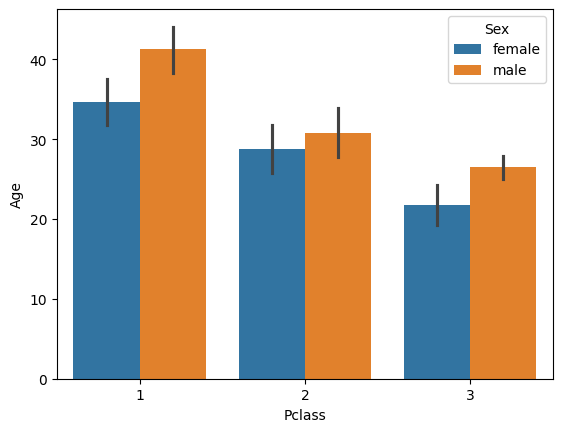

In [18]:
#barplot()함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기
#아래는 Pclass가 x축값이며 hue 파라미터로 Sex를 설정
#개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

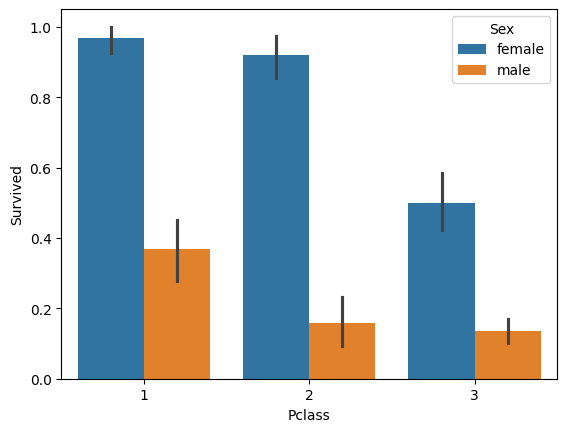

In [19]:
#개별 Pclass 값별로 Sex에 따른 Survived 평균값을 구함.
# Pclass가 x축 값이며 Survived가 Y축 값. hue 파라미터로 Sex를 설정
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

###박스 플롯
- boxplot() -> x, y 인자로 연속형 값 입력하며 y에 입력 시 수직 박스 플롯, x에 입력 시 수평 박스 플롯
- 추가적인 세분화 레벨로 여러 박스 플롯 표현할 시 x인자는 반드시 **이산형 값**

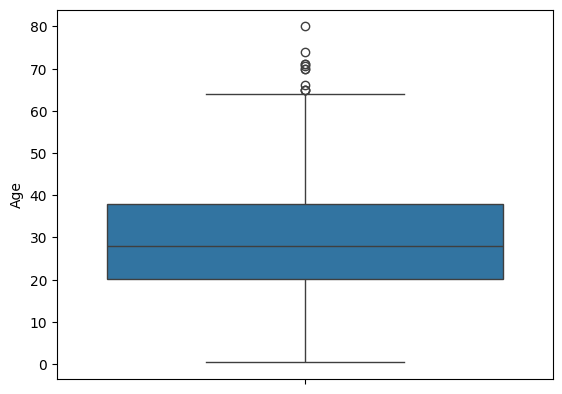

In [20]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

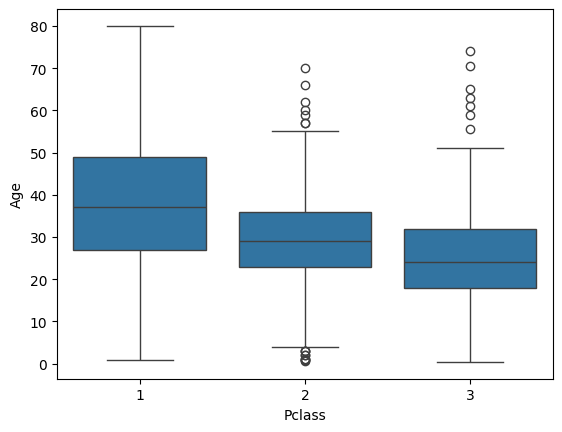

In [21]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

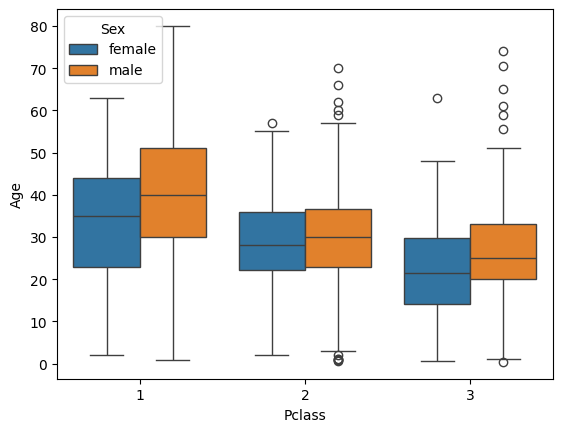

In [22]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

###바이올린 플롯
- 히스토그램의 연속 확률 분포 곡선과 박스 플롯 함께 시각화

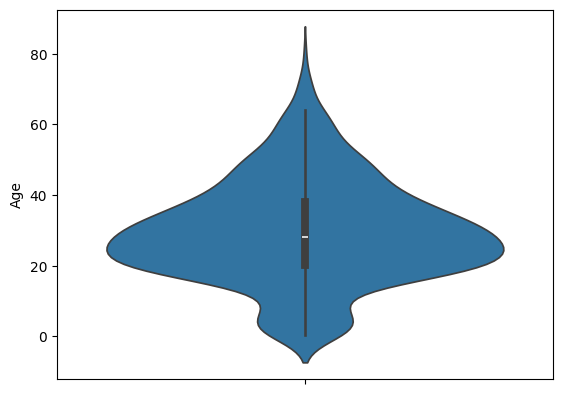

In [23]:
#Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

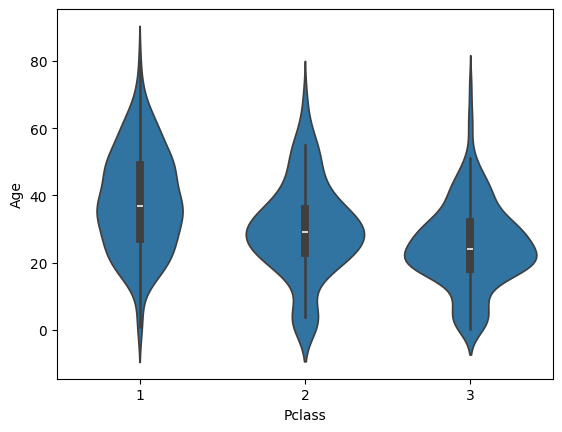

In [24]:
#x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
#pClass값별 Age 데이터 분포를 비교하여 볼 수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()


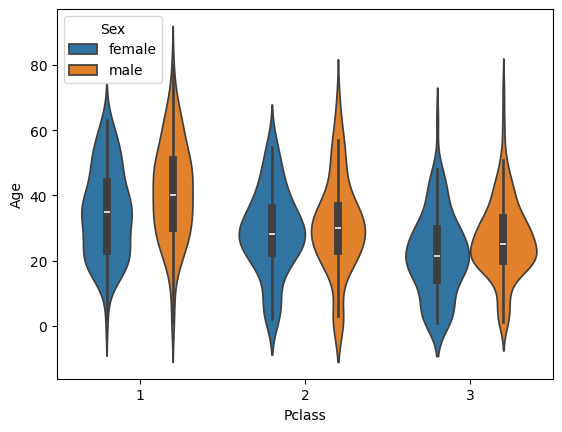

In [25]:
#x축값인 개별 Pclass 내에서 Sex 값별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

###subplots를 이용하여 시본의 다양한 그래프를 시각화
- 시본의 시각화 함수를 subplots로 할당된 개별 Axes 객체에 적용 -> ax라는 인자에 Axes 객체 할당
    
    *ex) fig, axs= plt.subplots(nrows=1, ncols=3) 이면 sns.countplot(x=칼럼명, data=DataFrame, ax=axs[0]) 처럼 입력 시 해당 위치의 subplot에 카운트 플롯을 시각화 해줌* ?
- countplot() : 범주형 변수의 개수(빈도)를 자동으로 세어 그림

index: 0
index: 1
index: 2


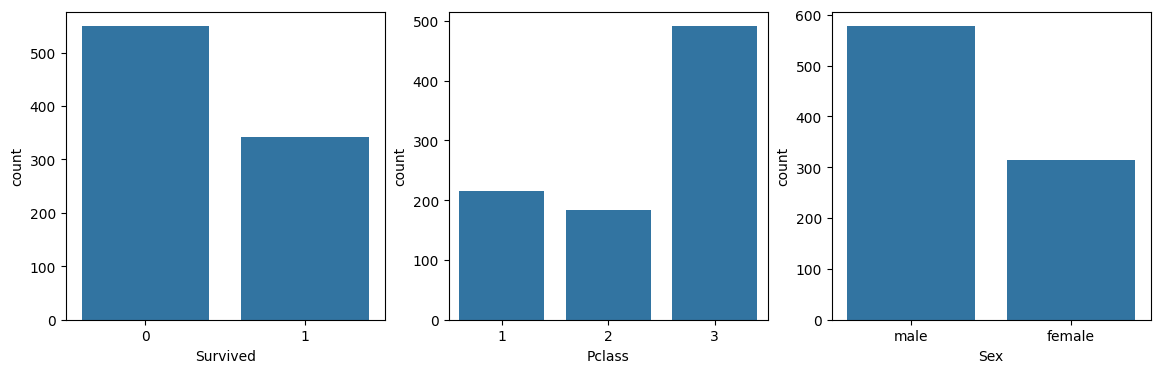

In [26]:
cat_columns=['Survived','Pclass','Sex']

#nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs= plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

#enumerate = 반복문 돌릴 때 인덱스 번호랑 원소를 같이 뽑아주는 함수

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

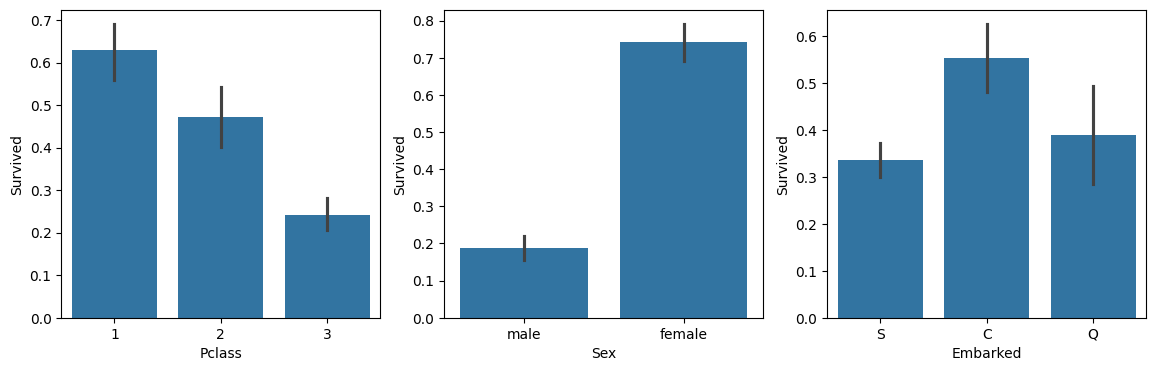

In [27]:
cat_columns=['Pclass','Sex','Embarked']

#nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs= plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
    #seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

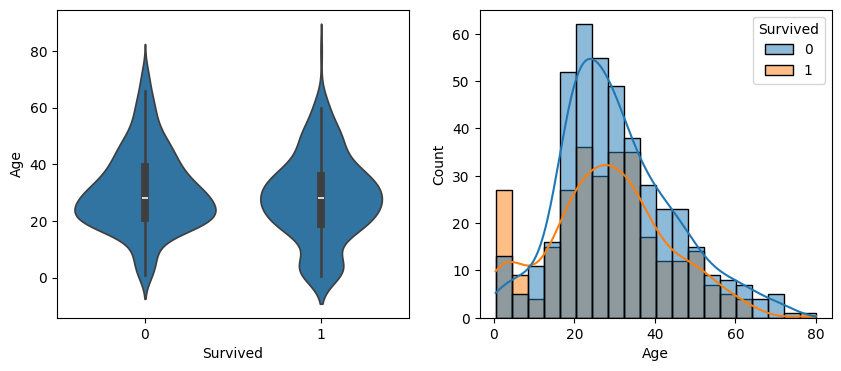

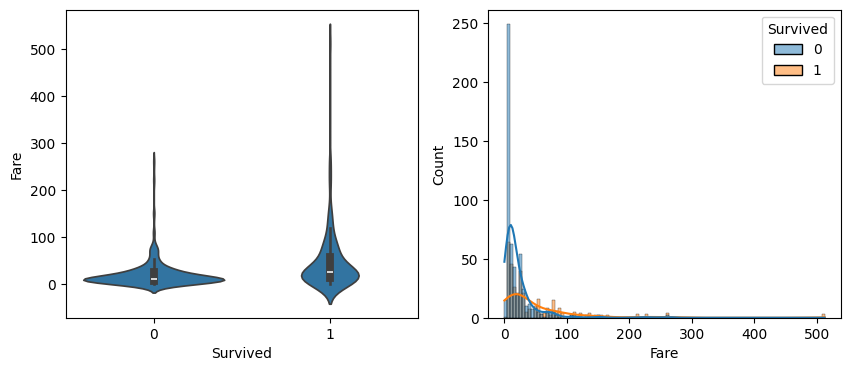

In [29]:
cont_columns=['Age','Fare']

#리스트로 할당된 칼럼들의 개수만큼 루프 수행
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화, nrows는 1, ncols=2인 서브플롯 생성.
    fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    # 왼쪽 Axes 객체에는 Survived 값 0, 1별 개별 칼럼의 바이올린 플롯 시각화.
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    # 오른쪽 Axes 객체에는 Survived 값 0, 1별 개별 칼럼의 히스토그램 시각화.
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

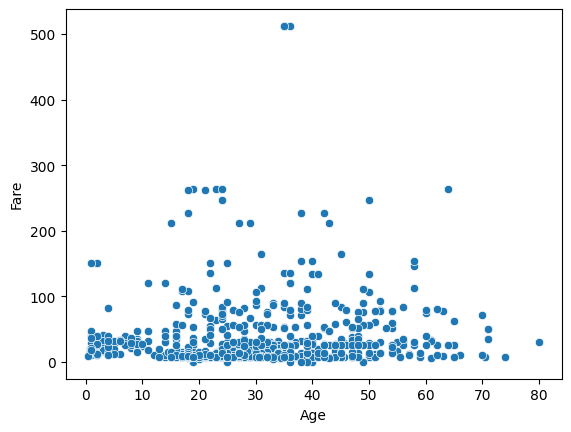

In [30]:
###산점도, 스캐터 플롯(Scatter plot) -hue 인자 지원
#x축 값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

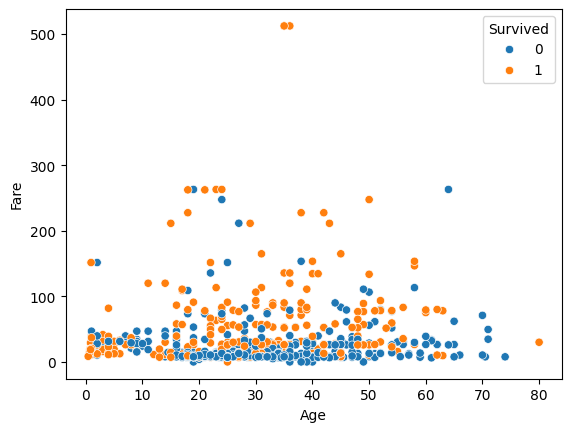

In [31]:
#hue 인자
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

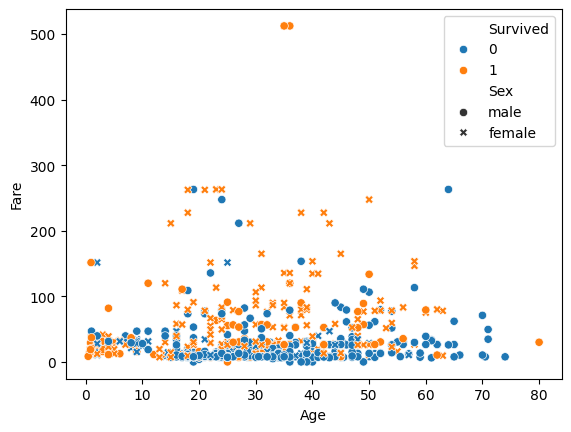

In [32]:
#style 인자
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

###상관 히트맵

:다수의 속성들 간의 상관계수를 히트맵 형태로
- heatmap() 함수 -> DataFrame을 입력받아야 시각화가능 => 판다스의 corr() 메서드 호출하여 DataFrame 생성
- annot 인자 -> T/F로 설정할 수 있고 T 일 경우 숫자로 된 상관계숫값 표시
    -> 정밀도가 높으면 숫자값이 겹침 -> fmt 인자로 포맷 변경 => fmt='.1f'로 설정하면 소수점 한 자리까지만 값 표시
- cbar 인자 -> T/F 설정할 수 있고 T 일 경우 숫자값에 따른 색깔 기준 막대로 표시

In [33]:
corr_df=titanic_df.corr(numeric_only=True)
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


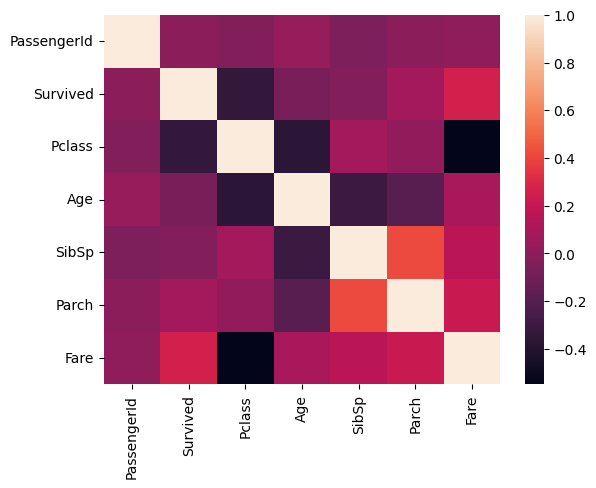

In [35]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr=titanic_df.corr(numeric_only=True)
sns.heatmap(corr)
plt.show()

#Survived랑 Pclass칼럼은 음의 상관계수 -> 생존 0,1과 선실 1,2,3 이 반대관계여서

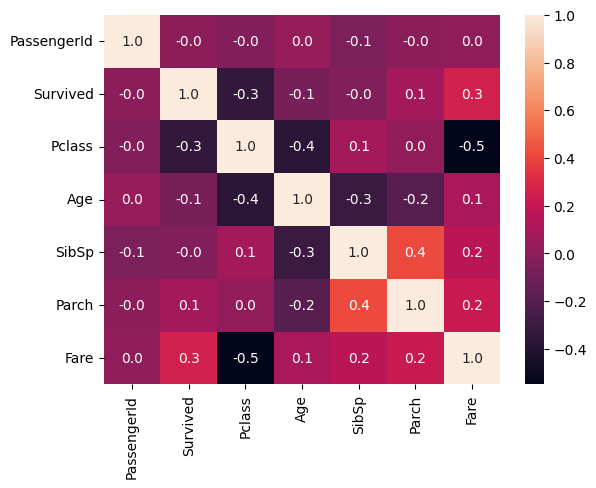

In [36]:
sns.heatmap(corr,annot=True, fmt='.1f',cbar=True)
plt.show()